# 한글폰트

In [ ]:
# 폰트 설치
!apt-get update -qq # 나눔고딕 설치
!apt-get install fonts-nanum* -qq

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()
# 여기까지 실행 후 "런타임 다시 시작..." 실행 (이 부분은 실행할 필요 없음)

Selecting previously unselected package fonts-nanum.
(Reading database ... 160983 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-6_all.deb ...
Unpacking fonts-nanum-eco (1.000-6) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20170925-1_all.deb ...
Unpacking fonts-nanum-extra (20170925-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-1_all.deb ...
Unpacking fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-extra (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Setting up fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-eco (1.000-6) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


# Install

In [ ]:
# Tokenizer library 설치
!pip install sentencepiece

     |████████████████████████████████| 1.2MB 6.2MB/s 


# Evn

In [ ]:
# imports
import argparse
import os
import random
import shutil
import json
import zipfile
import math
import copy
import collections
import re

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sentencepiece as spm
import tensorflow as tf
import tensorflow.keras.backend as K

from tqdm.notebook import tqdm, trange

In [ ]:
# 환경 설정
args = {
    # random seed value
    "seed": 1234
}
args = argparse.Namespace(**args)

print(args)

Namespace(seed=1234)


In [ ]:
# random seed 설정
random.seed(args.seed)
np.random.seed(args.seed)
tf.random.set_seed(args.seed)

In [ ]:
# gpu 사용량 확인
!nvidia-smi

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



In [ ]:
# google drive mount
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# data dir
data_dir = '/content/drive/MyDrive/ict-ai-복합고급언어-nlp'
os.listdir(data_dir)

['data', 'day1', '02-01-실습']

# argparse

In [ ]:
args = {
    "name": "aaaa",
    "value": 1234,
    "text": "nice to meet you"
}
args = argparse.Namespace(**args)

args

Namespace(name='aaaa', text='nice to meet you', value=1234)

In [ ]:
args.name, args.value

('aaaa', 1234)

# os

In [ ]:
# 폴더 목록 조회
os.listdir(data_dir)

['data-20210420T111231Z-001.zip']

In [ ]:
# 경로생성
temp_path = os.path.join(data_dir, 'aaa')
temp_path

'/content/drive/MyDrive/Data/nlp/aaa'

In [ ]:
# 폴더 생성
os.makedirs(temp_path)
# 폴더 목록 조회
os.listdir(data_dir)

['kowiki', 'aaa']

In [ ]:
# 폴더 생성
os.removedirs(temp_path)
# 폴더 목록 조회
os.listdir(data_dir)

['kowiki']

# random

In [ ]:
# random 값 생성 (0 .. 1)
random.random()

0.9664535356921388

In [ ]:
# 1..6 사이의 값 random 선택
random.randrange(1,7)

4

In [ ]:
# random 순서 섞기
a = [1, 2, 3, 4, 5, 6]
random.shuffle(a)
a

[2, 4, 3, 5, 6, 1]

# shutil

In [ ]:
os.listdir("sample_data")

['README.md',
 'anscombe.json',
 'california_housing_test.csv',
 'california_housing_train.csv',
 'mnist_train_small.csv',
 'mnist_test.csv']

In [ ]:
os.listdir(data_dir)

['data-20210420T111231Z-001.zip']

In [ ]:
# 복사
shutil.copy(os.path.join("sample_data", 'README.md'), os.path.join(data_dir, 'README.md'))
os.listdir(data_dir)

['kowiki', 'README.md']

In [ ]:
# 이동 (이름변경)
shutil.move(os.path.join(data_dir, 'README.md'), 'AAA.md')
os.listdir(data_dir)

['kowiki']

In [ ]:
os.listdir()

['.config', 'sample_data']

In [ ]:
os.removedirs('sample_data')

OSError: ignored

In [ ]:
# 삭제 (사용시 매우 주의 필요)
shutil.rmtree('sample_data')
os.listdir()

['.config']

# json

In [ ]:
# json 선언
a = {"a": 1, "b": {"c": "2", "d": 3.2}, "e": [1, 2, 3]}
a, type(a)

({'a': 1, 'b': {'c': '2', 'd': 3.2}, 'e': [1, 2, 3]}, dict)

In [ ]:
# json을 string으로 변환
a_str = json.dumps(a)
a_str, type(a_str)

('{"a": 1, "b": {"c": "2", "d": 3.2}, "e": [1, 2, 3]}', str)

In [ ]:
# string을 json으로 변환
b = json.loads(a_str)
a, type(b)

({'a': 1, 'b': {'c': '2', 'd': 3.2}, 'e': [1, 2, 3]}, dict)

In [ ]:
# 파일에 json 저장
with open(os.path.join("a.json"), "w") as f:
    json.dump(a, f)

In [ ]:
# 파일에서 1개의 json 읽기
with open(os.path.join("a.json")) as f:
    c = json.load(f)
c, type(c)

({'a': 1, 'b': {'c': '2', 'd': 3.2}, 'e': [1, 2, 3]}, dict)

In [ ]:
# 파일에 여러개 json 저장
with open(os.path.join("b.json"), "w") as f:
    f.write(json.dumps(a))
    f.write("\n")
    f.write(json.dumps({"a": 2, "b": {"c": "2", "d": 3.2}, "e": [1, 2, 3]}))
    f.write("\n")
    f.write(json.dumps({"a": 3, "b": {"c": "2", "d": 3.2}, "e": [1, 2, 3]}))
    f.write("\n")

In [ ]:
# 파일에서 여러개 json 읽기
with open(os.path.join("b.json")) as f:
    for line in f:
        print(line.strip())
        data = json.loads(line)
        print(data)
        print()

{"a": 1, "b": {"c": "2", "d": 3.2}, "e": [1, 2, 3]}
{'a': 1, 'b': {'c': '2', 'd': 3.2}, 'e': [1, 2, 3]}

{"a": 2, "b": {"c": "2", "d": 3.2}, "e": [1, 2, 3]}
{'a': 2, 'b': {'c': '2', 'd': 3.2}, 'e': [1, 2, 3]}

{"a": 3, "b": {"c": "2", "d": 3.2}, "e": [1, 2, 3]}
{'a': 3, 'b': {'c': '2', 'd': 3.2}, 'e': [1, 2, 3]}



In [ ]:
# 파일삭제
os.remove(os.path.join(data_dir, "a.json"))
os.remove(os.path.join(data_dir, "b.json"))
# 폴더 목록 조회
os.listdir(data_dir)

['kowiki']

In [ ]:
os.lisdir(data_dir)

AttributeError: ignored

# zipfile

In [ ]:
os.listdir(data_dir)

['data', 'day1', '02-01-실습']

In [ ]:
kowiki_dir = os.path.join(data_dir, "data")

In [ ]:
os.listdir(kowiki_dir)

['data-20210420T111231Z-001.zip']

In [ ]:
# wiki 내용 확인
with zipfile.ZipFile(os.path.join(kowiki_dir, "data-20210420T111231Z-001.zip")) as z:
    with z.open("data-20210420T111231Z-001") as f:
        for i, line in enumerate(f):
            if  100 < i:
                break
            line = line.decode('utf-8').strip()
            print(line)

KeyError: ignored

In [ ]:
# 파일 복사
shutil.copy(os.path.join(kowiki_dir, "kowiki.txt.zip"), "kowiki.txt.zip")
os.listdir()

['.config', 'drive', 'a.json', 'kowiki.txt.zip', 'b.json']

In [ ]:
# unzip
!unzip kowiki.txt.zip
os.listdir()

Archive:  kowiki.txt.zip
  inflating: kowiki.txt              
  inflating: __MACOSX/._kowiki.txt   


['.config',
 '__MACOSX',
 'drive',
 'a.json',
 'kowiki.txt.zip',
 'b.json',
 'kowiki.txt']

In [ ]:
with open("kowiki.txt") as f:
    for i, line in enumerate(f):
        if  100 < i:
            break
        print(line.strip())

지미 카터
제임스 얼 "지미" 카터 주니어(, 1924년 10월 1일 ~ )는 민주당 출신 미국 39번째 대통령 (1977년 ~ 1981년)이다.
지미 카터는 조지아주 섬터 카운티 플레인스 마을에서 태어났다. 조지아 공과대학교를 졸업하였다. 그 후 해군에 들어가 전함·원자력·잠수함의 승무원으로 일하였다. 1953년 미국 해군 대위로 예편하였고 이후 땅콩·면화 등을 가꿔 많은 돈을 벌었다. 그의 별명이 "땅콩 농부" (Peanut Farmer)로 알려졌다.
1962년 조지아 주 상원 의원 선거에서 낙선하나 그 선거가 부정선거 였음을 입증하게 되어 당선되고, 1966년 조지아 주 지사 선거에 낙선하지만 1970년 조지아 주 지사를 역임했다. 대통령이 되기 전 조지아주 상원의원을 두번 연임했으며, 1971년부터 1975년까지 조지아 지사로 근무했다. 조지아 주지사로 지내면서, 미국에 사는 흑인 등용법을 내세웠다.
1976년 대통령 선거에 민주당 후보로 출마하여 도덕주의 정책으로 내세워, 포드를 누르고 당선되었다.
카터 대통령은 에너지 개발을 촉구했으나 공화당의 반대로 무산되었다.
카터는 이집트와 이스라엘을 조정하여, 캠프 데이비드에서 안와르 사다트 대통령과 메나헴 베긴 수상과 함께 중동 평화를 위한 캠프데이비드 협정을 체결했다.
그러나 이것은 공화당과 미국의 유대인 단체의 반발을 일으켰다. 1979년 백악관에서 양국 간의 평화조약으로 이끌어졌다. 또한 소련과 제2차 전략 무기 제한 협상에 조인했다.
카터는 1970년대 후반 당시 대한민국 등 인권 후진국의 국민들의 인권을 지키기 위해 노력했으며, 취임 이후 계속해서 도덕정치를 내세웠다.
그러나 주 이란 미국 대사관 인질 사건에서 인질 구출 실패를 이유로 1980년 대통령 선거에서 공화당의 로널드 레이건 후보에게 져 결국 재선에 실패했다. 또한 임기 말기에 터진 소련의 아프가니스탄 침공 사건으로 인해 1980년 하계 올림픽에 반공국가들의 보이콧을 내세웠다.
지미 카터는 대한민국과의 관계에서도 중요한 영향을 미쳤던 대통

# math

In [ ]:
math.pi, math.e

(3.141592653589793, 2.718281828459045)

In [ ]:
math.log(math.e)

1.0

In [ ]:
math.exp(1)

2.718281828459045

# copy

In [ ]:
a = [0, 1, 2, 3, 4, [5, 6, 7, 8]]
b = a

In [ ]:
# a와 b는 같은 값
b[1] = 10
a, b

([0, 10, 2, 3, 4, [5, 6, 7, 8]], [0, 10, 2, 3, 4, [5, 6, 7, 8]])

In [ ]:
# a와 c는 다른 값
c = copy.copy(a)
c[1] = 20
a, c

([0, 10, 2, 3, 4, [5, 6, 7, 8]], [0, 20, 2, 3, 4, [5, 6, 7, 8]])

In [ ]:
# a[5]와 c[5]는 같은 값
c[5][1] = 23
a, c

([0, 10, 2, 3, 4, [5, 23, 7, 8]], [0, 20, 2, 3, 4, [5, 23, 7, 8]])

In [ ]:
# a와 d는 다른 값
d = copy.deepcopy(a)
d[5][1] = 99
a, d

([0, 10, 2, 3, 4, [5, 23, 7, 8]], [0, 10, 2, 3, 4, [5, 99, 7, 8]])

# collections

In [ ]:
a = {}
a['aa'], a

KeyError: ignored

In [ ]:
b = collections.defaultdict(int)
b['aa'], b

(0, defaultdict(int, {'aa': 0}))

# re

In [ ]:
string = "홍길의 키는 170 이고 영수는 165 이다."

In [ ]:
re.match(r"\d+", string)

In [ ]:
re.search(r"\d+", string)

<re.Match object; span=(7, 10), match='170'>

In [ ]:
re.findall(r"\d+", string)

['170', '165']

# matplotlib.pyplot

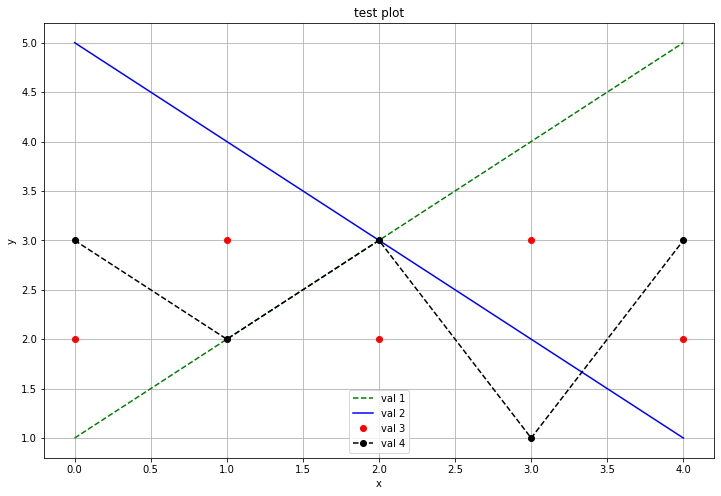

In [ ]:
# plot
plt.figure(figsize=(12, 8))
plt.plot([1, 2, 3, 4, 5], "--g", label='val 1')
plt.plot([5, 4, 3, 2, 1], "-b", label='val 2')
plt.plot([2, 3, 2, 3, 2], "or", label='val 3')
plt.plot([3, 2, 3, 1, 3], "o--k", label='val 4')
plt.title("test plot")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.legend()
plt.show()

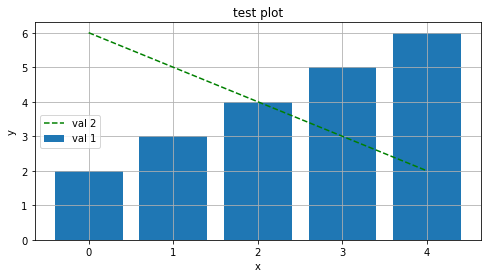

In [ ]:
# bar and plot
plt.figure(figsize=(8, 4))
plt.bar([0, 1, 2, 3, 4], [2, 3, 4, 5, 6], label='val 1')
plt.plot([6, 5, 4, 3, 2], "--g", label='val 2')
plt.title("test plot")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.legend()
plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54620 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44544 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53580 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49828 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53944 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44050 missing from current font.
  font.set_

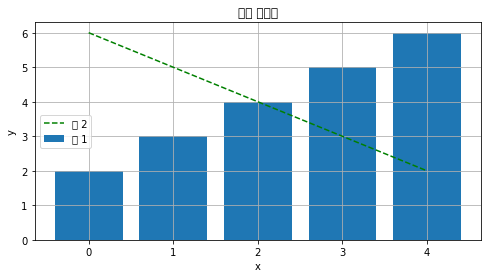

In [ ]:
# bar and plot
plt.figure(figsize=(8, 4))
plt.bar([0, 1, 2, 3, 4], [2, 3, 4, 5, 6], label='값 1')
plt.plot([6, 5, 4, 3, 2], "--g", label='값 2')
plt.title("한글 테스트")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.legend()
plt.show()

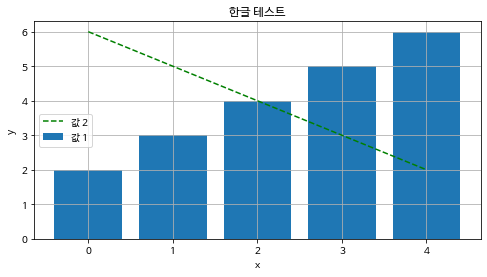

In [ ]:
# 한글 설정
plt.rc('font', family="NanumBarunGothic")
plt.rcParams["axes.unicode_minus"] = False # 한글 폰트 사용시 - 깨지는 문제 해결
# bar and plot
plt.figure(figsize=(8, 4))
plt.bar([0, 1, 2, 3, 4], [2, 3, 4, 5, 6], label='값 1')
plt.plot([6, 5, 4, 3, 2], "--g", label='값 2')
plt.title("한글 테스트")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.legend()
plt.show()

# pandas

In [ ]:
# random value
values = np.random.rand(6, 4)
values

array([[0.19151945, 0.62210877, 0.43772774, 0.78535858],
       [0.77997581, 0.27259261, 0.27646426, 0.80187218],
       [0.95813935, 0.87593263, 0.35781727, 0.50099513],
       [0.68346294, 0.71270203, 0.37025075, 0.56119619],
       [0.50308317, 0.01376845, 0.77282662, 0.88264119],
       [0.36488598, 0.61539618, 0.07538124, 0.36882401]])

In [ ]:
# dataframe
index = ["2021-04-19", "2021-04-20", "2021-04-21", "2021-04-22", "2021-04-23", "2021-04-24"]
df = pd.DataFrame(values, index=index, columns=["A", "B", "C", "D"])
df

,A,B,C,D
2021-04-19,0.191519,0.622109,0.437728,0.785359
2021-04-20,0.779976,0.272593,0.276464,0.801872
2021-04-21,0.958139,0.875933,0.357817,0.500995
2021-04-22,0.683463,0.712702,0.370251,0.561196
2021-04-23,0.503083,0.013768,0.772827,0.882641
2021-04-24,0.364886,0.615396,0.075381,0.368824


In [ ]:
# 기본정보
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6 entries, 2021-04-19 to 2021-04-24
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       6 non-null      float64
 1   B       6 non-null      float64
 2   C       6 non-null      float64
 3   D       6 non-null      float64
dtypes: float64(4)
memory usage: 240.0+ bytes


In [ ]:
# 숫자로 된 값의 정보
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,0.580178,0.518750,0.381745,0.650148
std,0.281706,0.316487,0.228791,0.202315
min,0.191519,0.013768,0.075381,0.368824
25%,0.399435,0.358293,0.296803,0.516045
50%,0.593273,0.618752,0.364034,0.673277
75%,0.755848,0.690054,0.420858,0.797744
max,0.958139,0.875933,0.772827,0.882641


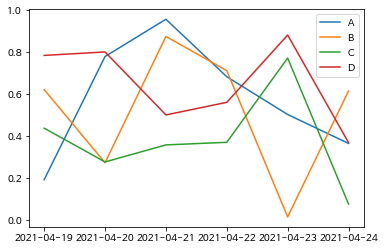

In [ ]:
# plot
df.plot()

In [ ]:
# index 초기화
df2 = df.reset_index()
df2

,index,A,B,C,D
0,2021-04-19,0.191519,0.622109,0.437728,0.785359
1,2021-04-20,0.779976,0.272593,0.276464,0.801872
2,2021-04-21,0.958139,0.875933,0.357817,0.500995
3,2021-04-22,0.683463,0.712702,0.370251,0.561196
4,2021-04-23,0.503083,0.013768,0.772827,0.882641
5,2021-04-24,0.364886,0.615396,0.075381,0.368824


In [ ]:
# index 변경
df2.set_index("A")

,index,B,C,D
A,,,,
0.191519,2021-04-19,0.622109,0.437728,0.785359
0.779976,2021-04-20,0.272593,0.276464,0.801872
0.958139,2021-04-21,0.875933,0.357817,0.500995
0.683463,2021-04-22,0.712702,0.370251,0.561196
0.503083,2021-04-23,0.013768,0.772827,0.882641
0.364886,2021-04-24,0.615396,0.075381,0.368824


In [ ]:
# index 초기화
df2 = df.reset_index()
df2

,index,A,B,C,D
0,2021-04-19,0.191519,0.622109,0.437728,0.785359
1,2021-04-20,0.779976,0.272593,0.276464,0.801872
2,2021-04-21,0.958139,0.875933,0.357817,0.500995
3,2021-04-22,0.683463,0.712702,0.370251,0.561196
4,2021-04-23,0.503083,0.013768,0.772827,0.882641
5,2021-04-24,0.364886,0.615396,0.075381,0.368824


In [ ]:
# csv 파일로 저장
df2.to_csv(os.path.join("aaa.csv"), index=False)

In [ ]:
# csv 파일 읽어오기
df3 = pd.read_csv(os.path.join("aaa.csv"))
df3

,index,A,B,C,D
0,2021-04-19,0.191519,0.622109,0.437728,0.785359
1,2021-04-20,0.779976,0.272593,0.276464,0.801872
2,2021-04-21,0.958139,0.875933,0.357817,0.500995
3,2021-04-22,0.683463,0.712702,0.370251,0.561196
4,2021-04-23,0.503083,0.013768,0.772827,0.882641
5,2021-04-24,0.364886,0.615396,0.075381,0.368824


In [ ]:
# 파일삭제
os.remove(os.path.join(data_dir, "aaa.csv"))

# numpy

In [ ]:
# 배열
a = [1, 2, 3, 4, 5]
a

[1, 2, 3, 4, 5]

In [ ]:
# numpy 배열
np.array(a)

array([1, 2, 3, 4, 5])

In [ ]:
# random int 배열
A = np.random.randint(0, 10, (5, 4))
A

array([[3, 1, 3, 1],
       [3, 7, 1, 7],
       [4, 0, 5, 1],
       [5, 9, 9, 4],
       [0, 9, 8, 8]])

In [ ]:
# random 배열 (0, 1)
B = np.random.rand(5, 4)
B

array([[0.92954594, 0.91811655, 0.97530172, 0.39700197],
       [0.26262609, 0.43015136, 0.76453077, 0.59973081],
       [0.08094696, 0.70454447, 0.16401332, 0.03234935],
       [0.32815036, 0.47386   , 0.06808472, 0.3827107 ],
       [0.11855414, 0.89632852, 0.76430853, 0.37540494]])

In [ ]:
# random 배열 (평균 0, 표준편차 1의 정규분포에서 셈플링)
C = np.random.randn(5, 4)
C

array([[ 0.5312549 ,  1.27528435, -0.68282564, -0.94818614],
       [ 0.7773618 ,  0.3251135 , -1.20348608,  1.20954346],
       [ 0.15762162, -0.29355482,  0.11155997,  0.59767854],
       [-1.270093  ,  0.12094906, -0.19389815,  1.8041719 ],
       [-0.23469376,  0.9399084 , -0.17152003, -0.15305462]])

In [ ]:
# row index of array
A[1]

array([3, 7, 1, 7])

In [ ]:
# row, col index of array
A[1, 1]

7

In [ ]:
# col index of array
A[:, 1]

array([1, 7, 0, 9, 9])

In [ ]:
# row sub array
A[:2]

array([[3, 1, 3, 1],
       [3, 7, 1, 7]])

In [ ]:
# col sub array
A[:, :2]

array([[3, 1],
       [3, 7],
       [4, 0],
       [5, 9],
       [0, 9]])

# tqdm, trange

In [ ]:
# 테스트용
import time

In [ ]:
# array progress
a = np.arange(0, 200)
p_bar = tqdm(a)
for v in p_bar:
    p_bar.set_description(f"value={v}")
    time.sleep(0.1)

In [ ]:
# array progress
a = np.arange(0, 20)
p_bar = tqdm(a, total=10)
for v in p_bar:
    p_bar.set_description(f"value={v}")
    time.sleep(1)

In [ ]:
# array progress
a = np.arange(0, 20)
p_bar = tqdm(a, total=100)
for v in p_bar:
    p_bar.set_description(f"value={v}")
    time.sleep(1)

In [ ]:
# trange progress
p_bar = trange(1, 30)
for v in p_bar:
    p_bar.set_description(f"value={v}")
    time.sleep(1)